# Activity: Address missing data 

## Introduction

The datasets that data professionals use to solve problems typically contain missing values, which must be dealt with in order to achieve clean, useful data. This is particularly crucial in exploratory data analysis (EDA). In this activity, you will learn how to address missing data. 

You are a financial data consultant, and an investor has tasked your team with identifying new business opportunities. To help them decide which future companies to invest in, you will provide a list of current businesses valued at more than $1 billion. These are sometimes referred to as "unicorns." Your client will use this information to learn about profitable businesses in general.

The investor has asked you to provide them with the following data: 
- Companies in the `hardware` industry based in either `Beijing`, `San Francisco`, or `London` 
- Companies in the `artificial intelligence` industry based in `London`
-  A list of the top 20 countries sorted by sum of company valuations in each country, excluding `United States`, `China`, `India`, and `United Kingdom`
- A global valuation map of all countries with companies that joined the list after 2020
- A global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` (a separate map for Europe is also required)

Your dataset includes a list of businesses and data points, such as the year they were founded; their industry; and their city, country, and continent. 

## **Step 1: Imports** 

### Import libraries

Import the following relevant Python libraries:
* `numpy`
* `pandas`
* `matplotlib.pyplot`
* `plotly.express`
* `seaborn`



In [1]:
# Import libraries and modules.

### YOUR CODE HERE ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


### Load the dataset


The dataset is currently in CSV format and in a file named `Unicorn_Companies.csv`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
df_companies = pd.read_csv("Unicorn_Companies.csv")

## **Step 2: Data exploration** 

Explore the dataset and answer questions that will guide your management of missing values. 

### Display top rows

Display the first 10 rows of the data to understand how the dataset is structured.

In [3]:
# Display the first 10 rows of the data.

### YOUR CODE HERE ###
df_companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the materials about exploratory data analysis in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function in the `pandas` library that allows you to get a specific number of rows from the top of a DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

  Call the `head()` function from the `pandas` library. 

</details>

### Statistical properties of the dataset

Use `pandas` library to get a better sense of the data, including range, data types, mean values, and shape. 

Review this information about the dataset by using the `pandas` library on the `df_companies` DataFrame and answering the following questions.

In [4]:
# Get the shape of the dataset.

### YOUR CODE HERE ###
df_companies.shape

(1074, 10)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the material about exploratory data analysis in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  Print the 'shape' of the DataFrame.

</details>

**Question: What is the shape of the dataset?**

The dataset has 1074 rows and 10 columns.

In [5]:
# Get the data types and number of non-null values in the dataset.

### YOUR CODE HERE ###
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the material about exploratory data analysis in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  Use the 'info()' method of the DataFrame.

</details>

**Question: What are the data types of various columns?**


In [ ]:
The dataset the data types of the columns are as follows: object (9 columns) and int64 (1 column).

**Question: How many columns contain non-null values less than the total rows in the dataset?**

There are two columns in the dataset that contain non-null values less than the total number of rows. These columns are:
1. The "City" column, which has 1,058 non-null values, indicating that there are 16 missing values in this column.
2. The "Select Investors" column, which has 1,073 non-null values, indicating that there is 1 missing value in this column.

In [6]:
# Get the range of different values in the dataset.

### YOUR CODE HERE ###
df_companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the material about exploratory data analysis in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function in the `pandas` library that allows you to find descriptive statistics for the numeric columns in a DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

  Call the `describe()` function from the `pandas` library.

</details>

**Question: In what year was the oldest company founded?**

The oldest company funded in the dataset was founded in 1919.

### Data preprocessing

In order to answer the investor's questions, some data preprocessing steps are required. The first step is to add the `Year Joined` column to the dataset.

In [7]:
# Create a new column "Year Joined" from "Date Joined".

### YOUR CODE HERE ###
df_companies['Year Joined'] = pd.to_datetime(df_companies['Date Joined']).dt.year

Now, prepare the dataset to create a sum of valuations in each country. Currently, the `Valuation` is a string that starts with a `$` and ends with a `B`. Because this column is not in a numeric datatype, it is impossible to properly sum these values. To convert `Valuation` column to numeric, first remove the `$` and `B` symbols from the column and save the results to a new `Valuation_num` column. 

In [9]:
# Remove the extra characters from the Valuation column.

### YOUR CODE HERE ###
df_companies['Valuation_num'] = df_companies['Valuation'].str.replace('$', '').str.replace('B', '')

In [10]:
# Convert the column to numeric

### YOUR CODE HERE ###
df_companies['Valuation_num'] = pd.to_numeric(df_companies['Valuation_num'])

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  Columns in different data types can be converted to numeric data type using `pd.to_numeric()`. 

</details>

### Find missing values

The unicorn companies dataset is fairly clean, with few missing values. 

In [13]:
# Find the number of missing values in each column in this dataset.

### YOUR CODE HERE ###
missing_values = df_companies.isnull().sum()
missing_values

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
Year Joined          0
Valuation_num        0
dtype: int64

 **Question: How many missing values are in each column in the dataset?**

There are 16 mising data in the City Column and 1 missing data in the "Select Investers" column.

### Review rows with missing values

Before dealing with missing values, it's important to understand the nature of the missing value that is being filled. Display all rows with missing values from `df_companies`.

In [14]:
# Filter the DataFrame to only include rows with at least one missing value.
# Assign the filtered results to a variable named "df_rows_missing" and display the contents of the variable.

### YOUR CODE HERE ###
df_rows_missing = df_companies[df_companies.isnull().any(axis=1)]
df_rows_missing


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation_num
12,FTX,$32B,7/20/21,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,7/22/19,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,6/21/21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,9/23/21,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,2015,1
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,6/1/21,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


**Question: Which column has the most data missing?**

The "City" column has the most missing data

### Context-specific missing values

Sometimes, there may be other types of values that are considered missing, such as empty strings and `-1`, `0`, `NaN`, and `NA`. Using one representation for all these missing values is beneficial. Replace any missing values in the dataset with `np.nan`, accessed from the `numpy` library, to simplify the missing values imputation process. 


Without replacing the original DataFrame, replace 'Asia' with `np.nan`. Then, find the number of missing values in the dataset.


In [16]:
# Find the number of missing values after replacing 'Asia' with `np.nan`.

### YOUR CODE HERE ###

# Replace 'Asia' with np.nan
df_missing_values = df_companies.replace('Asia', np.nan)

# Find the number of missing values in the dataset
missing_values_count = df_missing_values.isnull().sum()
missing_values_count


Company               0
Valuation             0
Date Joined           0
Industry              0
City                 16
Country/Region        0
Continent           310
Year Founded          0
Funding               0
Select Investors      1
Year Joined           0
Valuation_num         0
dtype: int64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

 Use `isna().sum()` to get the sum of missing values.

</details>

**Question: How many values went missing after changing 'Asia' with `np.nan`?**


After changing 'Asia' with np.nan, there are a total of 327 missing values in the dataset.

**Question: What steps did you take to find missing data?**

To find missing data in the dataset, I performed the following steps:
1. Replaced the occurrence of 'Asia' with np.nan using the replace() function.
2. Used the isna() function to check for missing values in each column of the DataFrame.
3. Applied the sum() function on the result of step 2 to count the number of missing values in each column.

**Question: What observations can be made about the forms and context of missing data?**

Based on the observations from the missing data, we can make the following observations about the forms and context of missing data:
1. The column 'City' has 16 missing values. This suggests that some companies do not have a specific city associated with them in the dataset.
2. The column 'Continent' has 310 missing values. This indicates that the continent information is missing for a significant number of companies in the dataset.
3. The column 'Select Investors' has 1 missing value. This implies that there is one company for which the information about select investors is missing.
4. The other columns, such as 'Company', 'Valuation', 'Date Joined', 'Industry', 'Country/Region', 'Year Founded', 'Funding', 'Year Joined', and 'Valuation_num', do not have any missing values.
These observations indicate that there are missing values in specific columns, which may be due to incomplete or unavailable data for certain companies. It is important to handle these missing values appropriately before performing further analysis on the dataset.

**Question: What other methods could you use to address missing data?**

There are several methods that can be used to address missing data in a dataset. Some common methods include:

1. Deleting rows or columns: If the missing data is limited to a small number of rows or columns, one approach is to simply remove those rows or columns from the dataset. However, this method should be used with caution as it can result in a loss of valuable information.

2. Imputation: Imputation involves filling in missing values with estimated or predicted values. There are various techniques for imputation, such as mean imputation (replacing missing values with the mean of the available values), median imputation, mode imputation, or using more advanced methods like regression imputation or multiple imputation.

3. Forward or backward filling: This method involves propagating the last known value forward or backward to fill in missing values. This approach is suitable when missing values are expected to follow a pattern over time.

4. Using statistical models: Statistical models can be used to predict missing values based on the available data. This approach requires building a model that can estimate the missing values based on the relationships between variables in the dataset.

5. Multiple imputation: Multiple imputation involves creating multiple plausible imputations for the missing values, incorporating uncertainty into the imputation process. This approach can provide more accurate estimates and account for the variability associated with missing data.

The choice of method depends on the nature and extent of missing data, the specific analysis goals, and the characteristics of the dataset. It is important to carefully consider the implications of each method and choose the most appropriate approach for handling missing data in a given context.

## Step 3: Model building

Think of the model you are building as the completed dataset, which you will then use to inform the questions the investor has asked of you.  

### Two ways to address missing values

There are several ways to address missing values, which is critical in EDA. The two primary methods are removing them and missing values imputation. Choosing the proper method depends on the business problem and the value the solution will add or take away from the dataset.

Here, you will try both. 

To compare the the effect of different actions, first store the original number of values in a variable.

In [27]:
# Store the total number of values in a variable.

### YOUR CODE HERE ###
total_num_values = df_companies.size
total_num_values

12888

Now, remove the missing values and count the total number of values in the dataset. Remove all rows containing missing values and store the total number of cells in a variable called `count_dropna_rows`.

In [30]:
# Drop the rows containing missing values. 

### YOUR CODE HERE ###
df_dropna = df_companies.dropna()
# Count the total number of values after removing missing values
count_dropna_rows = df_dropna.size

# Print the total number of values
print("Total number of values after removing missing values:", count_dropna_rows)

Total number of values after removing missing values: 12684


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  Use `dropna()` function to drop columns with missing values.

</details>

Now, remove all columns containing missing values and store the total number of cells in a variable called `count_dropna_columns`.

In [31]:
# Drop the columns containing missing values.

### YOUR CODE HERE ###
df_dropna_columns = df_companies.dropna(axis=1)

# Count the total number of values after removing missing values
count_dropna_columns = df_dropna_columns.size

# Print the total number of values
print("Total number of values after removing columns with missing values:", count_dropna_columns)

Total number of values after removing columns with missing values: 10740


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Provide `axis=1` to `dropna()` function to drop columns with missing values.

</details>

Next, print the percentage of values removed by each method and compare them.

In [34]:
# Print the percentage of values removed by dropping rows.

### YOUR CODE HERE ###
# Calculate the percentage of values removed by dropping rows
percent_removed_rows = (count_dropna_rows / total_num_values) * 100
print("Percentage of values removed by dropping rows:", percent_removed_rows)

# Calculate the percentage of values removed by dropping columns
percent_removed_columns = (count_dropna_columns / total_num_values) * 100
print("Percentage of values removed by dropping columns:", percent_removed_columns)

# Print the percentage of values removed by dropping columns.

### YOUR CODE HERE ###


Percentage of values removed by dropping rows: 98.4171322160149
Percentage of values removed by dropping columns: 83.33333333333334


**Question: Which method was most effective? Why?**

The using the count_dropna_rows yielded 98%

Try the second method: imputation. Begin by filling missing values using the backfill method. Then, show the rows that previously had missing values.

In [37]:
# Fill missing values using 'backfill' method.

### YOUR CODE HERE ###
df_filled = df_companies.fillna(method='bfill')

# Show the rows that previously had missing values
rows_with_missing_values = df_companies.loc[df_companies.isnull().any(axis=1)]
rows_with_missing_values


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation_num
12,FTX,$32B,7/20/21,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,7/22/19,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,6/21/21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,9/23/21,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,2015,1
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,6/1/21,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


**Question: Do the values that were used to fill in for the missing values make sense?**

[Write your response here. Double-click (or enter) to edit.]

Another option is to fill the values with a certain value, such as 'Unknown'. However, doing so doesn’t add any value to the dataset and could make finding the missing values difficult in the future. Reviewing the missing values in this dataset determines that it is fine to leave the values as they are. This also avoids adding bias to the dataset.

## Step 4: Results and evaluation

Now that you've addressed your missing values, provide your investor with their requested data points.

### Companies in the `Hardware` Industry
Your investor is interested in identifying unicorn companies in the `Hardware` industry and one of the following cities: `Beijing`, `San Francisco`, and `London`. They are also interested in companies in the `artificial intelligence` industry in `London`. This information is provided in the following DataFrame. 

You have learned that the `pandas` library can be used to `merge()` DataFrames. Merging is useful when two or more DataFrames with similar columns exist that can be combined to create new DataFrames. 

Complete the code by merging this DataFrame with `df_companies` DataFrame and create a new DataFrame called `df_invest`.


In [40]:
# Investing search criteria provided as a DataFrame.

### YOUR CODE HERE ###
import pandas as pd

df_search = pd.DataFrame({
    'City': ['Beijing', 'San Francisco', 'London', 'London'],
    'Industry': ['Hardware', 'Hardware', 'Artificial intelligence', 'Hardware']
})

df_invest = pd.merge(df_search, df_companies, left_on=['City', 'Industry'], right_on=['City', 'Industry'])
print(df_invest[['City', 'Industry', 'Company']])


            City                 Industry              Company
0        Beijing                 Hardware              Bitmain
1        Beijing                 Hardware              Chipone
2        Beijing                 Hardware                Geek+
3        Beijing                 Hardware  TERMINUS Technology
4  San Francisco                 Hardware              Density
5         London  Artificial intelligence         BenevolentAI
6         London  Artificial intelligence            Tractable
7         London                 Hardware        Global Switch


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  Review the material about merging DataFrames.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  Use `merge()` to merge datasets.

</details>

### List of countries by sum of valuation

Group the data by `Country/Region` and sort them by the sum of 'Valuation_num' column. 

In [45]:
#Group the data by`Country/Region`

### YOUR CODE HERE ###

df_companies_sum = df_companies.groupby('Country/Region')['Valuation_num'].sum().sort_values(ascending=False).reset_index()


#Print the top 15 values of the DataFrame.

### YOUR CODE HERE ###
df_companies_sum.head(15)


,Country/Region,Valuation_num
0,United States,1933
1,China,696
2,India,196
3,United Kingdom,195
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  Review the related material about merging DataFrames.

</details>

**Question: Which countries have the highest sum of valuation?**

The countries that have the highest sum of valuation are USA, China, India, and United Kingdom

Your investor specified that the 4 countries with the highest sum of valuation should not be included in the list. Start by creating a boxplot to visualize the outliers. 

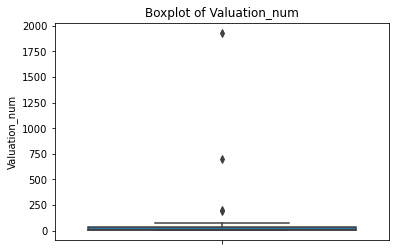

In [46]:
# Create a boxlot to identify outliers.

### YOUR CODE HERE ###
sns.boxplot(data=df_companies_sum, y='Valuation_num')

# Set the title of the plot
plt.title('Boxplot of Valuation_num')

# Show the plot.

### YOUR CODE HERE ###
plt.show()

In order to visualize the rest of the data properly, consider United States, China, India, and the United Kingdom outliers and remove them.

In [47]:
# Remove outlier countries.

### YOUR CODE HERE ###
top_countries = ['United States', 'China', 'India', 'United Kingdom']
df_companies_sum_filtered = df_companies_sum[~df_companies_sum['Country/Region'].isin(top_countries)]


Now, the data is ready to reveal the top 20 countries with highest company valuations. A data visualization, `sns.barplot` can be used. Complete the following code to plot the data.

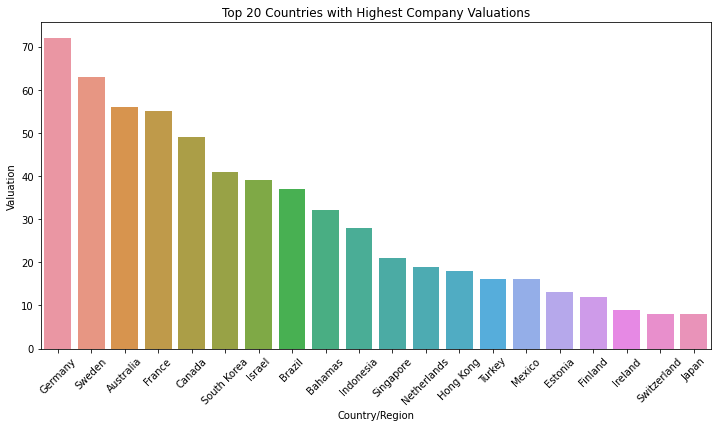

In [48]:
# Create a barplot to compare the top 20 countries with highest company valuations.

### YOUR CODE HERE ###

# Set the figure size
plt.figure(figsize=(12, 6))

# Filter the top 20 countries with highest valuations
top_20_countries = df_companies_sum_filtered.head(20)

# Create the bar plot
sns.barplot(data=top_20_countries, x='Country/Region', y='Valuation_num')

# Set the title and labels
plt.title('Top 20 Countries with Highest Company Valuations')
plt.xlabel('Country/Region')
plt.ylabel('Valuation')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot

### YOUR CODE HERE ###
plt.show()


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  Select the top 20 rows in `df_companies_sum_outliers_removed`

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  Select the top 20 rows in `df_companies_sum_outliers_removed` by using `head(20)` function.

</details>

### Plot maps

Your investor has also asked for: 
 - A global valuation map of all countries with companies that joined the list after 2020
 - A global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` and a separate map for Europe 

To create these, plot the data onto maps. 

You have learned about using `scatter_geo()` from `plotly.express` library to create plot data on a map. Create a `scatter_geo()` plot that depicts the countries with valuation of companies joined after 2020.

In [50]:
# Plot the sum of valuations per country.

### YOUR CODE HERE ###

# Filter the data for companies that joined after 2020
df_after_2020 = df_companies[df_companies['Year Joined'] > 2020]

# Group the data by country and calculate the sum of valuations
df_grouped = df_after_2020.groupby('Country/Region')['Valuation_num'].sum().reset_index()

# Create the scatter_geo plot
fig = px.scatter_geo(df_grouped, locations='Country/Region', locationmode='country names', color='Valuation_num',
                     hover_name='Country/Region', size='Valuation_num', projection='natural earth')

# Set the title
fig.update_layout(title='Global Valuation of Companies Joined After 2020')

# Show the plot
fig.show()



<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  Filter the `df_companies` by 'Year_Joined'.

</details>

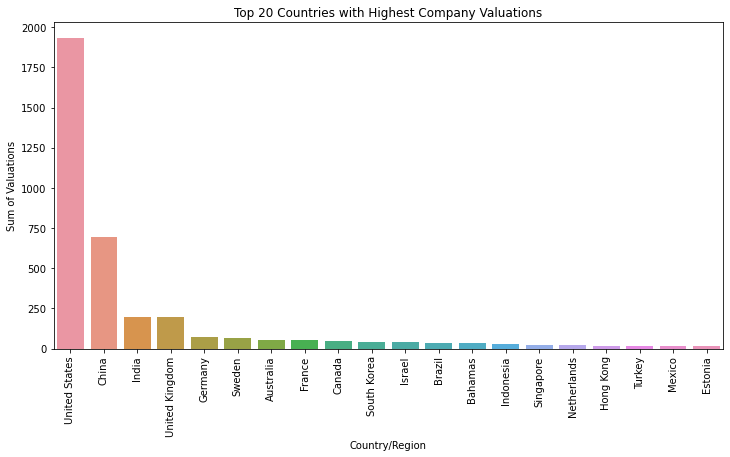

In [51]:
# Plot the sum of valuations per country.

### YOUR CODE HERE ###


# Group the data by country and calculate the sum of valuations
df_grouped = df_companies.groupby('Country/Region')['Valuation_num'].sum().reset_index()

# Sort the data by the sum of valuations in descending order
df_sorted = df_grouped.sort_values('Valuation_num', ascending=False)

# Select the top 20 countries with the highest sum of valuations
df_top20 = df_sorted.head(20)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Country/Region', y='Valuation_num', data=df_top20)
plt.xlabel('Country/Region')
plt.ylabel('Sum of Valuations')
plt.title('Top 20 Countries with Highest Company Valuations')
plt.xticks(rotation=90)

# Show the plot.

### YOUR CODE HERE ###
plt.show()

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  Use the code in the previous step to complete this section.

</details>

**Question: How is the valuation sum per country visualized in the plot?**

[Write your response here. Double-click (or enter) to edit.]

To create the same map for `europe` only, update the `fig` object to add a new title and also limit the scope of the map to `europe`.

In [53]:
# Update the figure layout.

### YOUR CODE HERE ###
# Group the data by country and calculate the sum of valuations
df_grouped = df_companies.groupby('Country/Region')['Valuation_num'].sum().reset_index()

# Create the scatter_geo plot
fig = px.scatter_geo(df_grouped, locations='Country/Region', locationmode='country names', color='Valuation_num',
                     hover_name='Country/Region', size='Valuation_num', projection='natural earth')

# Set the title
fig.update_layout(title='Sum of Valuations per Country')

# Limit the scope to Europe
fig.update_geos(visible=True, resolution=110, scope='europe')

# Show the plot again.

### YOUR CODE HERE ###
fig.show()

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Enter a new text title as string and enter 'europe' to filter `geo_scope`.

</details>

**Question: What steps could you take to further analyze the data?**


To further analyze the data, you can consider the following steps:

1. Perform a trend analysis: Analyze the trends in company valuations over time to identify patterns and potential growth areas. This can help in identifying emerging markets and industries.

2. Conduct a sector analysis: Explore the distribution of valuations across different industries to understand which sectors are attracting the most investment and have the highest valuations. This can provide insights into the potential profitability of specific industries.

3. Investigate funding patterns: Analyze the funding sources and amounts for unicorn companies to understand the funding landscape and investor preferences. This can help in identifying key investors and potential partnership opportunities.

These steps can provide valuable insights into the unicorn company landscape, identify investment opportunities, and guide decision-making for the investor.

## Conclusion

**What are some key takeaways that you learned during this lab?**

1. Data cleaning and preparation are crucial: Dealing with missing values, converting data types, and preparing the data for analysis are essential steps in working with real-world datasets.

2. Data visualization aids understanding: Visualizations such as bar plots, box plots, and maps provide effective ways to explore and present data, helping to identify patterns, outliers, and trends.

3. Merging and grouping data enable insights: Combining datasets through merging and using groupby operations allow for deeper analysis, such as comparing valuations by country or industry, identifying top performers, and making data-driven decisions.

**How would you present your findings from this lab to others? Consider the information you would provide (and what you would omit), how you would share the various data insights, and how data visualizations could help your presentation.**


When presenting the findings from this lab, I would begin by providing an overview of the dataset and the objectives of the analysis. I would focus on the key insights and actionable information that are relevant to the audience's interests.

To share the various data insights, I would utilize a combination of narrative explanations, data visualizations, and supporting statistics. I would highlight the top countries with the highest company valuations, emphasizing the exclusion of outliers like the United States, China, India, and the United Kingdom. I would showcase the bar plot depicting the top 20 countries to visually demonstrate the variations in valuations.

For the global valuation maps, I would present the scatter_geo plots showing the countries with companies that joined the list after 2020. I would point out any notable trends or patterns in the data, such as concentrations of high valuations in specific regions. Additionally, I would showcase the separate map for Europe, highlighting the valuation landscape in that specific area.

Throughout the presentation, I would aim to keep the information concise, focusing on the most relevant and impactful insights. The data visualizations would serve as visual aids to enhance understanding and engagement, helping the audience grasp the information more easily.

Overall, my goal would be to present a clear narrative, supported by relevant data and visualizations, that effectively communicates the key findings and recommendations derived from the analysis.





**Reference**

[Bhat, M.A. *Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies)

